<a href="https://colab.research.google.com/github/sweetmjkim/study_data_analytics/blob/main/docs/quests/EDAs/Q_EDA_ShoppingMallDeliveryWithDate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab 경우 Reuntime > Restart session 필요

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

df_SMDWD = pd.read_csv('/content/ShoppingMallDeliveryWithDate.csv')
df_SMDWD.dropna(inplace=True)
df_SMDWD.info()
df_SMDWD[:]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46661 entries, 0 to 46748
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   결제수단    46661 non-null  object 
 1   배송번호    46661 non-null  object 
 2   배송시작일   46661 non-null  object 
 3   배송완료일   46661 non-null  object 
 4   상품구매금액  46661 non-null  int64  
 5   상품번호    46661 non-null  float64
 6   수량      46661 non-null  int64  
 7   주문경로    46661 non-null  object 
 8   주문일     46661 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.6+ MB


,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일
0,무통장입금,D-20181227-0000648-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,71450,1077.0,1,PC쇼핑몰,20181227
1,무통장입금,D-20181229-0000119-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,141240,42.0,2,모바일웹,20181229
2,무통장입금,D-20181230-0000100-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,13910,1271.0,1,모바일웹,20181230
3,무통장입금,D-20181231-0000087-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,81600,1085.0,1,모바일웹,20181231
4,무통장입금,D-20181231-0000108-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,94710,1106.0,1,모바일웹,20181231
...,...,...,...,...,...,...,...,...,...
46744,카드,D-20171229-0000036-00,2017-12-29 오후 4:32,2018-01-02 오전 5:31,52800,445.0,1,모바일웹,20171229
46745,카드,D-20171229-0000043-00,2018-01-03 오전 9:45,2018-01-07 오전 5:38,112200,172.0,2,모바일웹,20171229
46746,카드,D-20171230-0000022-01,2018-01-02 오후 7:06,2018-01-11 오전 2:46,36000,140.0,1,네이버 페이,20171230
46747,카드,D-20171231-0000017-01,2018-01-03 오후 2:00,2018-01-06 오후 6:06,73460,184.0,1,네이버 페이,20171231


In [4]:
df_SMDWD['주문일'].sort_values(ascending=False)

17548    20190619
17547    20190619
17545    20190604
17542    20190602
17546    20190602
           ...   
45123    20170202
45122    20170123
45121    20170118
45120    20170115
45119    20170101
Name: 주문일, Length: 46661, dtype: int64

# 제안 8: 주문량 변동성 분석 및 예측
  - 문제 정의: 주문량의 시간별(X), 일별, 월별 변동성을 분석하고, 미래의 주문량을 예측합니다.
  - 배경: 주문량의 변동성을 이해하고 예측함으로써, 인력 및 자원 배치를 최적화하고 재고 관리 효율성을 향상시킬 수 있습니다.


## 연속형을 범주형 변환

In [5]:
df_SMDWD['주문일'].sort_values()

45119    20170101
45120    20170115
45121    20170118
45122    20170123
45123    20170202
           ...   
17546    20190602
17542    20190602
17545    20190604
17547    20190619
17548    20190619
Name: 주문일, Length: 46661, dtype: int64

## 기술 데이터 분석(DDA)

### 제안 8: 주문량 변동성 분석 및 예측
  - 문제 정의: 주문량의 시간별, 일별, 월별 변동성을 분석하고, 미래의 주문량을 예측합니다.
  - 배경: 주문량의 변동성을 이해하고 예측함으로써, 인력 및 자원 배치를 최적화하고 재고 관리 효율성을 향상시킬 수 있습니다

In [6]:
# 날짜별 주문량
df_SMDWD['주문일_datetime'] = pd.to_datetime(df_SMDWD['주문일'], format='%Y%m%d')

days_order = df_SMDWD['주문일_datetime'].value_counts()
days_order

2019-01-28    334
2018-12-26    255
2019-04-03    251
2018-11-08    248
2018-10-23    248
             ... 
2018-03-04      1
2017-06-05      1
2017-04-26      1
2017-06-07      1
2017-07-03      1
Name: 주문일_datetime, Length: 798, dtype: int64

In [7]:
df_SMDWD['주문일_datetime_year'] = df_SMDWD['주문일_datetime'].dt.year
df_SMDWD['주문일_datetime_month'] = df_SMDWD['주문일_datetime'].dt.month
df_SMDWD['주문일_datetime_day'] = df_SMDWD['주문일_datetime'].dt.day
df_SMDWD[:5]

,결제수단,배송번호,배송시작일,배송완료일,상품구매금액,상품번호,수량,주문경로,주문일,주문일_datetime,주문일_datetime_year,주문일_datetime_month,주문일_datetime_day
0,무통장입금,D-20181227-0000648-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,71450,1077.0,1,PC쇼핑몰,20181227,2018-12-27,2018,12,27
1,무통장입금,D-20181229-0000119-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,141240,42.0,2,모바일웹,20181229,2018-12-29,2018,12,29
2,무통장입금,D-20181230-0000100-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,13910,1271.0,1,모바일웹,20181230,2018-12-30,2018,12,30
3,무통장입금,D-20181231-0000087-00,2019-01-03 오전 9:30,2019-01-07 오전 5:32,81600,1085.0,1,모바일웹,20181231,2018-12-31,2018,12,31
4,무통장입금,D-20181231-0000108-00,2019-01-07 오전 8:56,2019-01-11 오전 5:32,94710,1106.0,1,모바일웹,20181231,2018-12-31,2018,12,31


In [8]:
# 년도별 주문량
year_order = df_SMDWD['주문일_datetime_year'].value_counts()
year_order

2018    27599
2019    17516
2017     1546
Name: 주문일_datetime_year, dtype: int64

In [9]:
# 월별 주문량
month_order = df_SMDWD['주문일_datetime_month'].value_counts()
month_order

5     5780
4     5344
3     4514
12    4372
11    4263
1     4205
10    3871
2     3546
8     3234
7     2858
9     2516
6     2158
Name: 주문일_datetime_month, dtype: int64

In [10]:
# 일별 주문량
day_order = df_SMDWD['주문일_datetime_month'].value_counts()
day_order

5     5780
4     5344
3     4514
12    4372
11    4263
1     4205
10    3871
2     3546
8     3234
7     2858
9     2516
6     2158
Name: 주문일_datetime_month, dtype: int64

In [11]:
df_SMDWD['상품번호'].value_counts()

455.0     1700
1237.0    1577
1374.0    1486
1209.0    1457
1373.0    1453
          ... 
1504.0       1
1208.0       1
1241.0       1
1461.0       1
333.0        1
Name: 상품번호, Length: 648, dtype: int64

In [12]:
# 월별 팔린 상품과 상품 개수
df_month_count = df_SMDWD.groupby('주문일_datetime_month')['상품번호'].value_counts().reset_index(name='팔린 개수')
df_month_count

,주문일_datetime_month,상품번호,팔린 개수
0,1,1374.0,251
1,1,1373.0,238
2,1,455.0,181
3,1,608.0,155
4,1,1077.0,150
...,...,...,...
3490,12,1359.0,1
3491,12,1372.0,1
3492,12,1379.0,1
3493,12,1392.0,1


## EDA

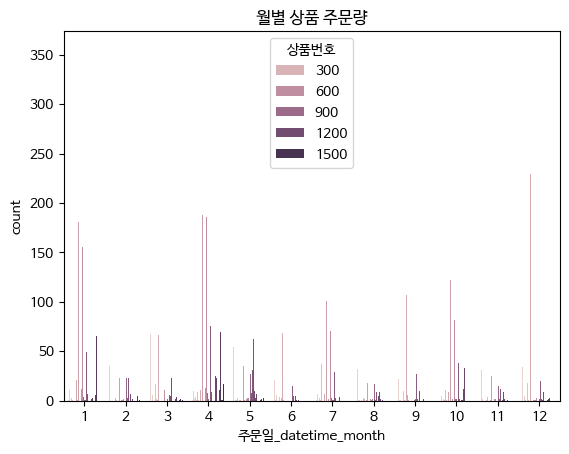

In [13]:
sns.countplot(data=df_SMDWD, x='주문일_datetime_month', hue='상품번호')
plt.title('월별 상품 주문량')
plt.show()